# Burger's Equation

In [31]:
###Import Library###
import numpy as np
from matplotlib import pyplot

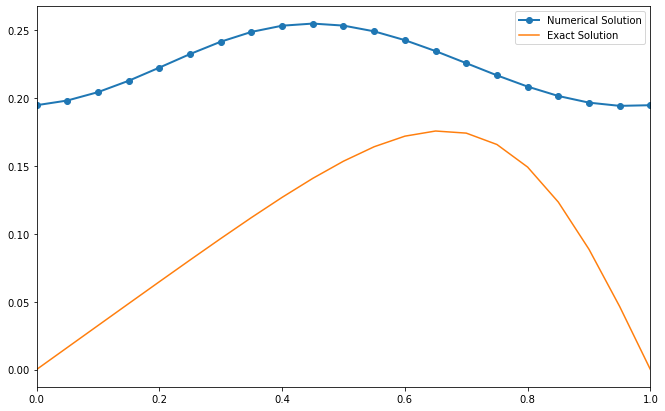

In [32]:
###Exact solution###

def exact(t,x):
    return (2*D*bet*np.pi*np.exp(-D*t*np.pi**2)*np.sin(np.pi*x))/(alp+bet*np.exp(-D*t*np.pi**2)*np.cos(np.pi*x))

###Input####

M = 20 #Number of step space
N = 40 #Number of step time
tb = 0 #Start time
te = 1 #End time
xl = 0 #Start space
xr = 1 #End space

#######

h = (xl-xr)/M #delta x
k = (te-tb)/N #delta t
n = N
m = M+1
D = 0.05 #Diffusion coefficient
alp = 5 
bet = 4

#######

x = np.linspace(xl, xr, m)
w = np.empty(m)
t = 0
w1 = np.asarray([exact(t, x0) for x0 in x])

for j in range(n):
    w = w1.copy()
    for i in range(1,m-1):
        w1[i] = w[i]-w[i]*k/h*(w[i]-w[i-1])+D*k/h**2*(w[i+1]-2*w[i]+w[i-1])
    w1[0] = w[0]-w[0]*k/h*(w[0]-w[-2])+D*k/h**2*(w[1]-2*w[0]+w[-2])
    w1[-1] = w1[0]
    
w1_exact  = np.asarray([exact(n*k, xi) for xi in x])

###Plotting###

pyplot.figure(figsize = (11,7))
pyplot.plot(x, w1, marker = 'o', lw = 2, label = 'Numerical Solution')
pyplot.plot(x, w1_exact, label = 'Exact Solution')
pyplot.xlim([0, 1])
pyplot.legend();
pyplot.show()